In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

df = pd.read_csv('SINASC_RO_2019.csv')
df['DTNASC'] = pd.to_datetime(df['DTNASC'])

meses_input = (input('Digite os meses da análise separados por vírgula: '))
meses = [int(mes.strip()) for mes in meses_input.split(',')]

In [16]:
def plot_pivot_tabela(df, values, index, aggfunc, ylabel, xlabel, opcao='nada'):
    
    if opcao == 'unstack':
        pd.pivot_table(df, values=values, index=index, aggfunc=aggfunc).unstack().plot(figsize=[15, 5])
    elif opcao == 'nada':
        pd.pivot_table(df, values=values, index=index, aggfunc=aggfunc).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=values, index=index, aggfunc=aggfunc).sort_values(values).plot(figsize=[15, 5])

    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)


    max_data = df['DTNASC'].max().strftime('%Y-%m')
    try:
        os.makedirs(f'./output/figs/{max_data}')
        plt.savefig(f'./output/figs/{max_data}/{ylabel}.png')
    except:
        plt.savefig(f'./output/figs/{max_data}/{ylabel}.png')

    
    return None


Decidi ir um pouco além já neste exercício para automatizá-lo
1. Já inseri a parte de criar a pasta e o arquivo dentro da própria função, para não precisar digitar o comando de exportar.
2. Inseri um "input", para selecionar o mês da análise, para não precisar ficando gerando a base mês por mês e alterar o código toda vez que for executá-lo.
3. O ideal desse código seria executá-lo em um script.py, porém estou mandando em jupyter notebook para eu conseguir comentar.
4. Todos os resultados da análise foram executados com o script criado.

Processamento do mês 2019-01 concluído!
Processamento do mês 2019-02 concluído!
Processamento do mês 2019-03 concluído!
Processamento do mês 2019-04 concluído!
Processamento do mês 2019-05 concluído!
Processamento do mês 2019-06 concluído!


c:\Users\Emanoel\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Processamento do mês 2019-07 concluído!
Processamento do mês 2019-08 concluído!
Processamento do mês 2019-09 concluído!
Processamento do mês 2019-10 concluído!
Processamento do mês 2019-11 concluído!
Processamento do mês 2019-12 concluído!


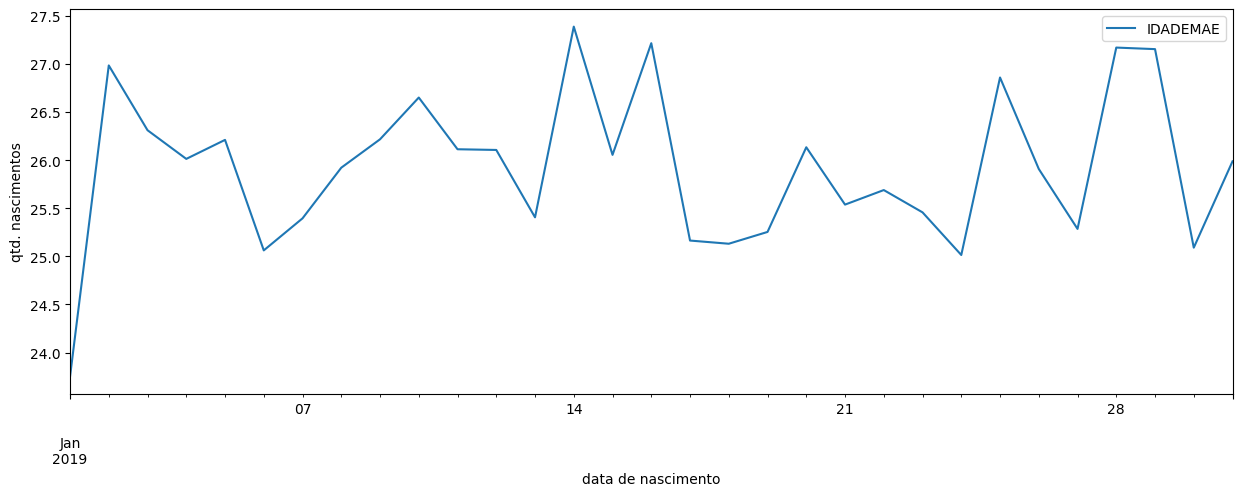

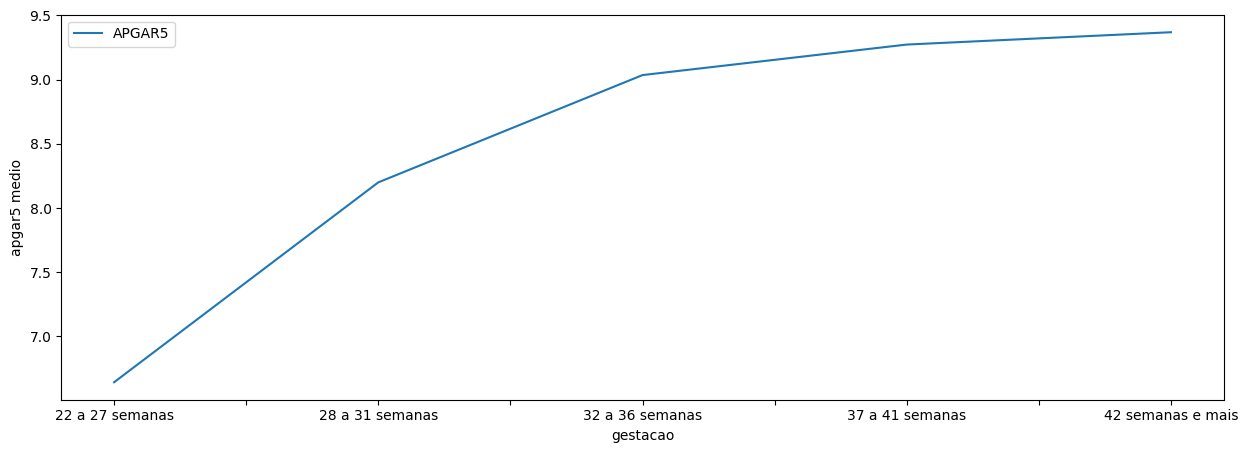

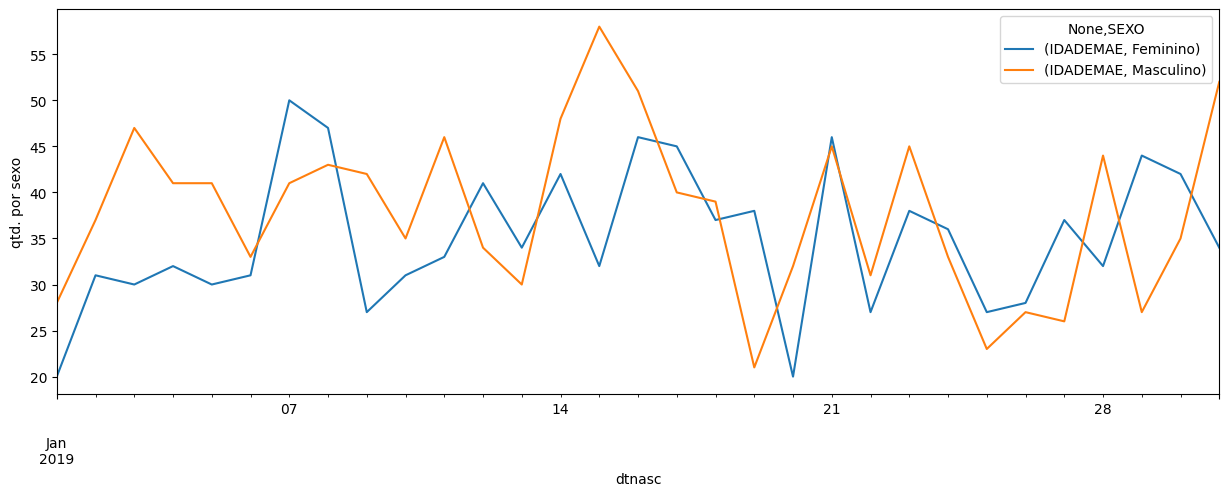

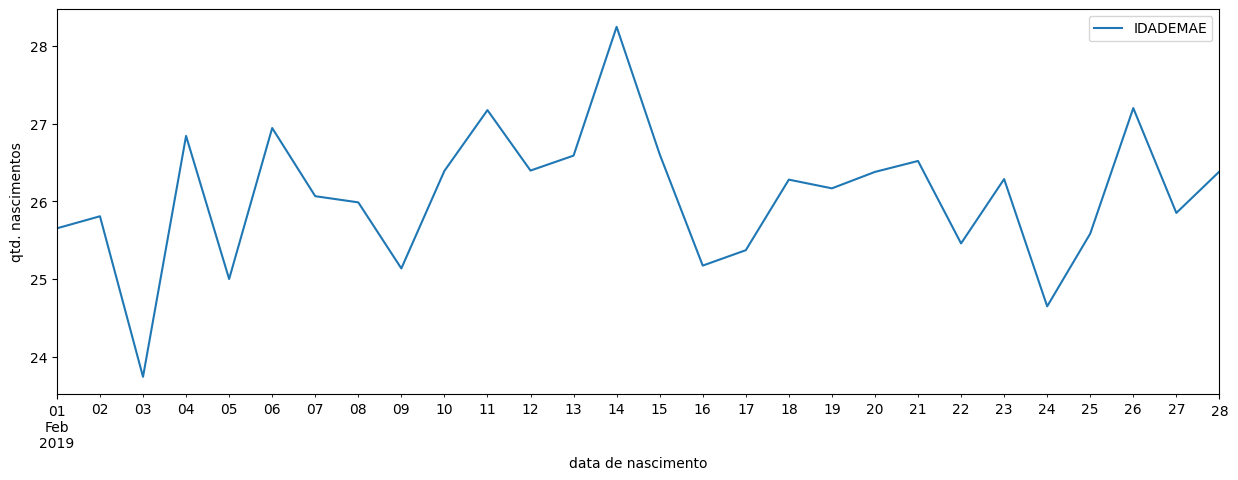

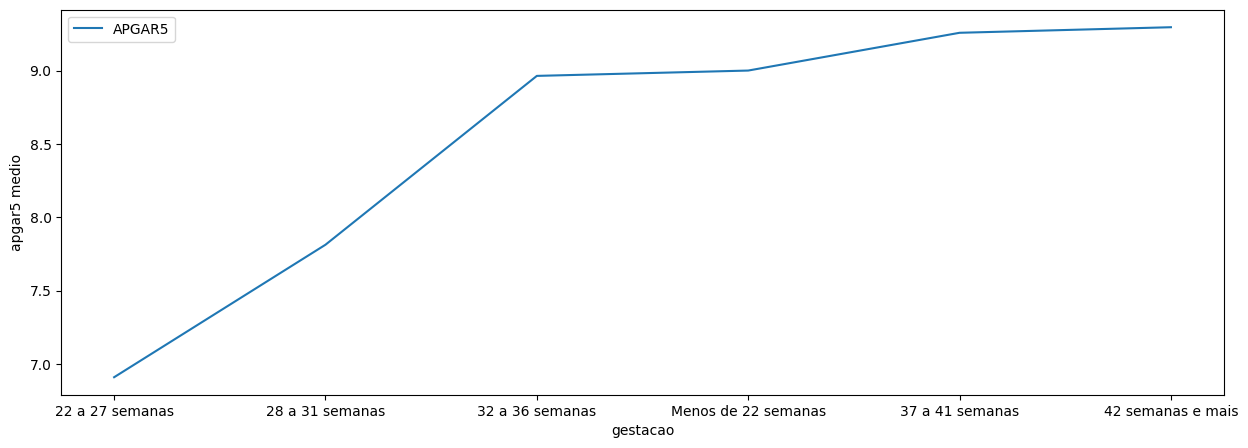

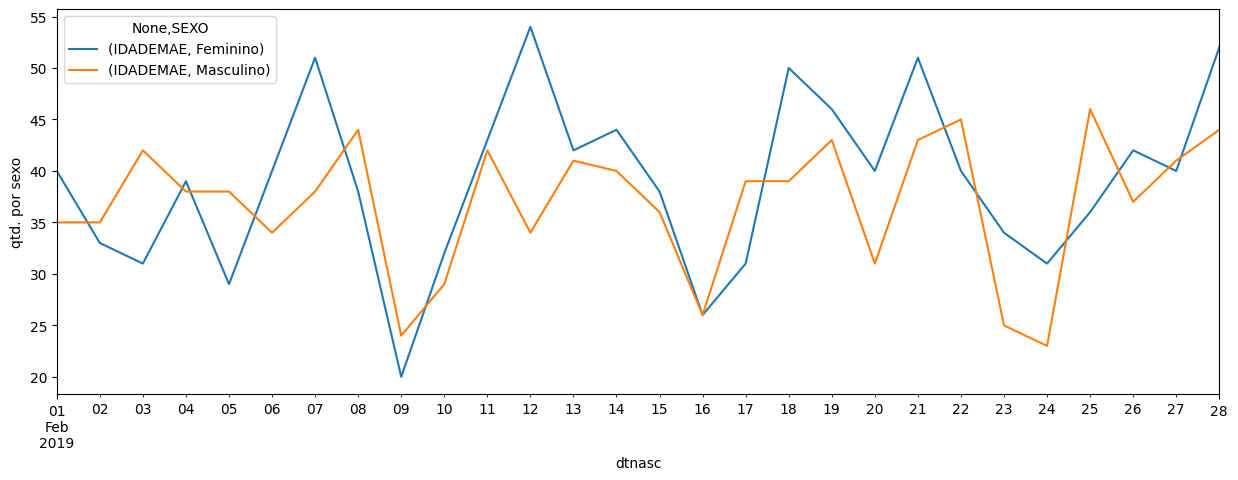

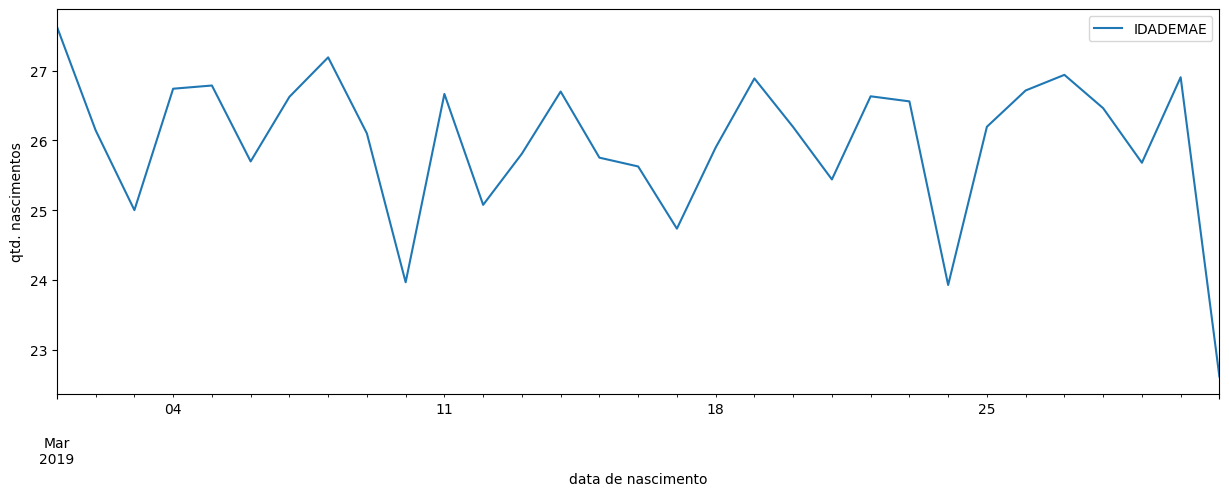

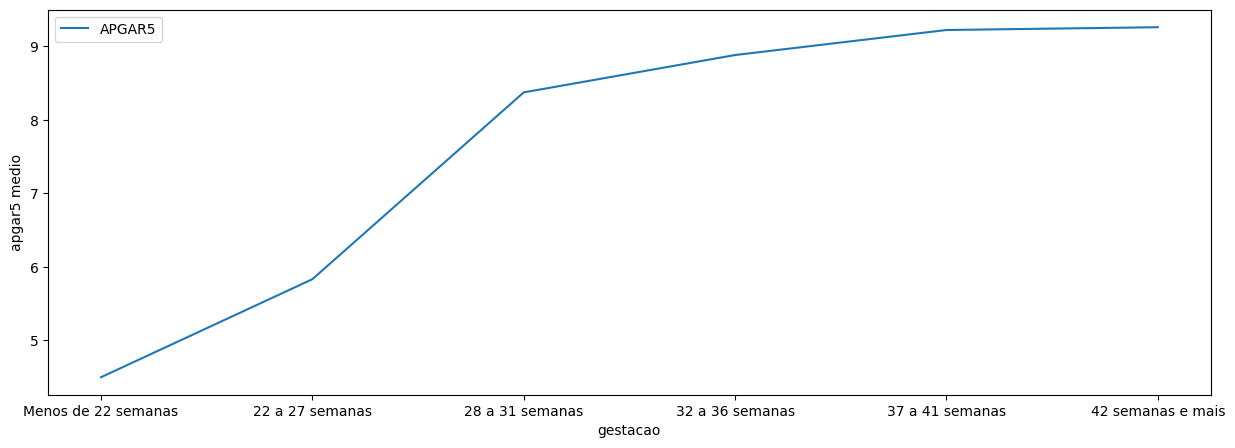

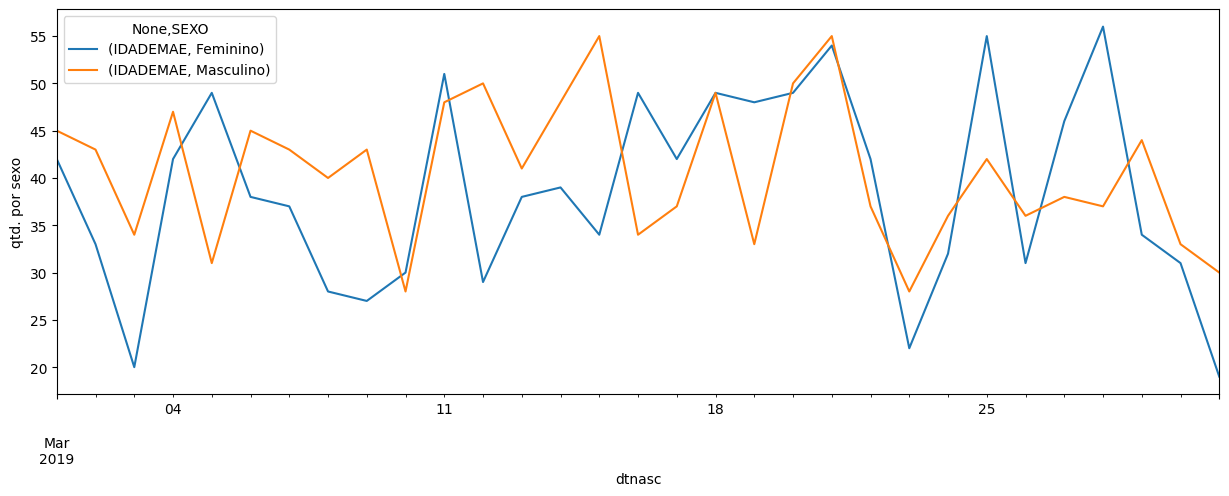

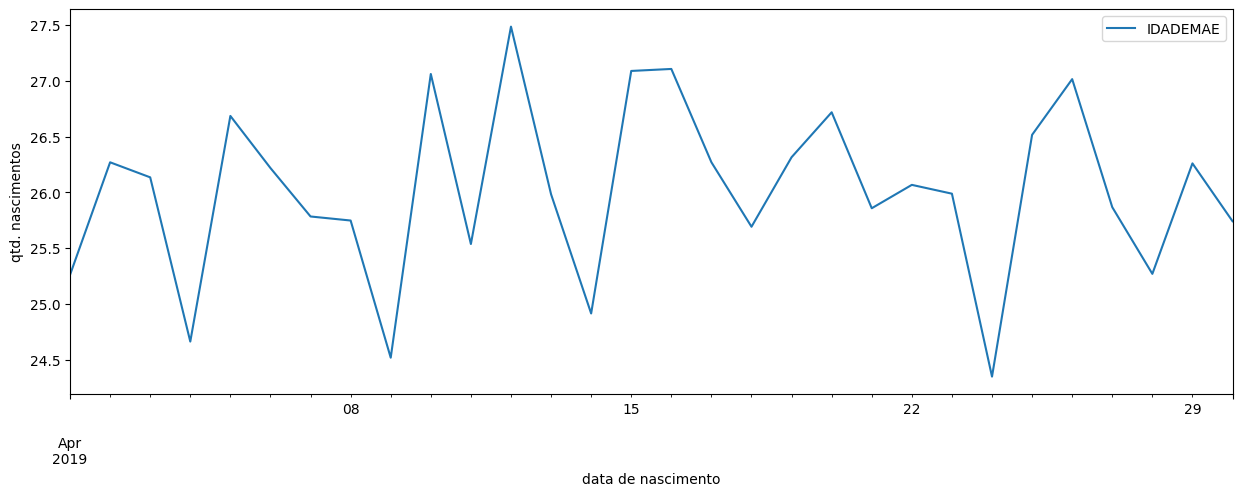

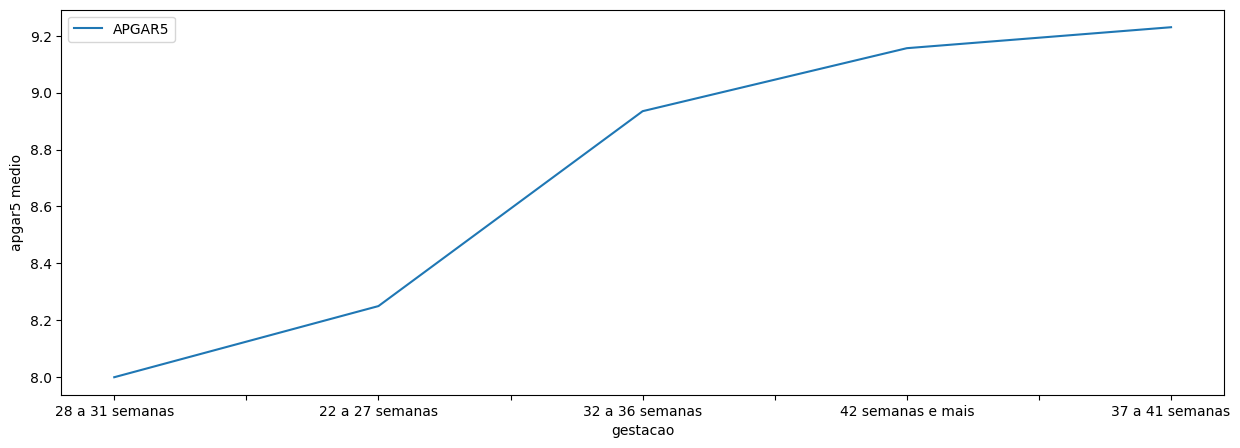

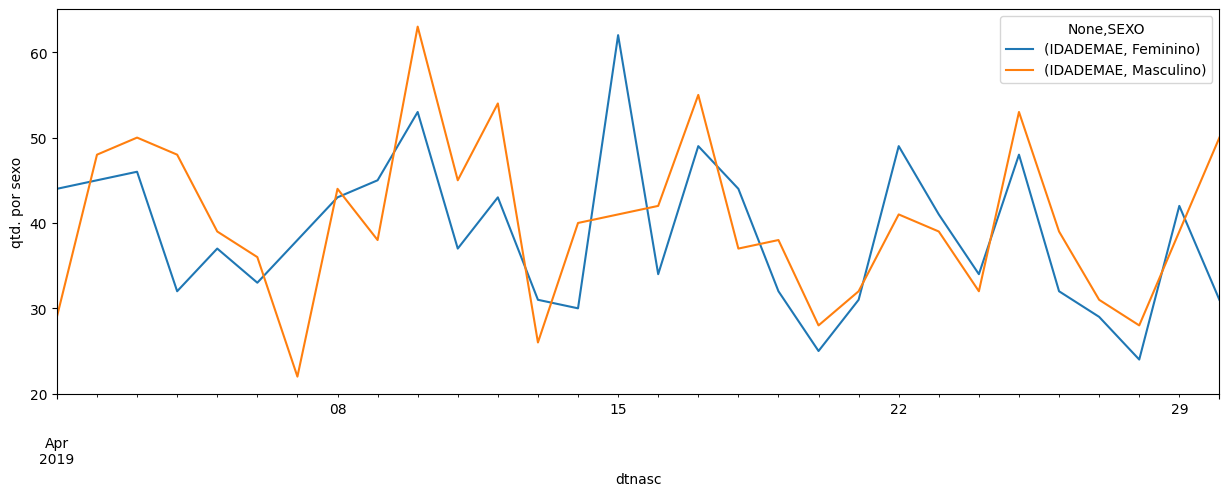

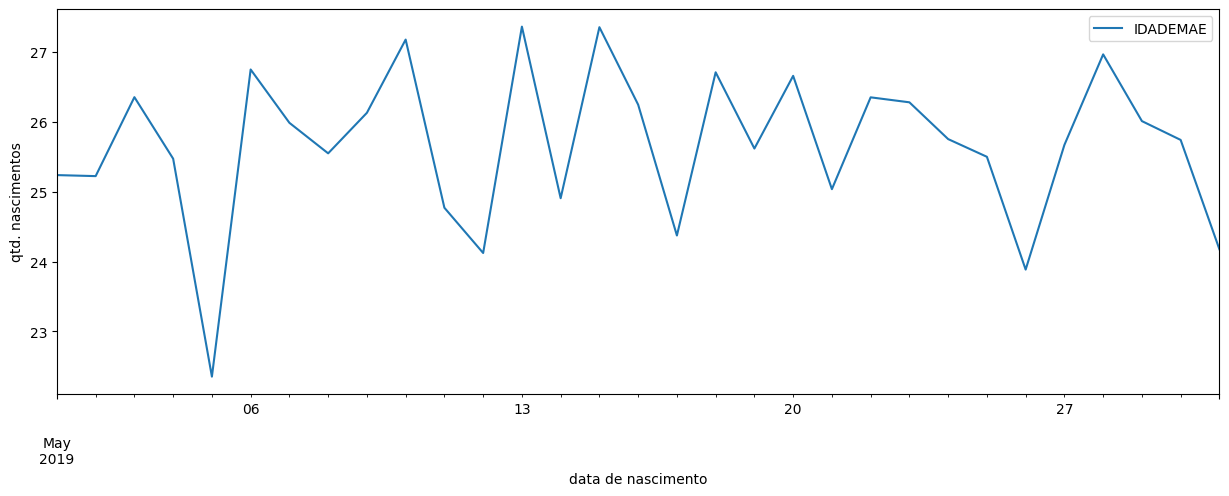

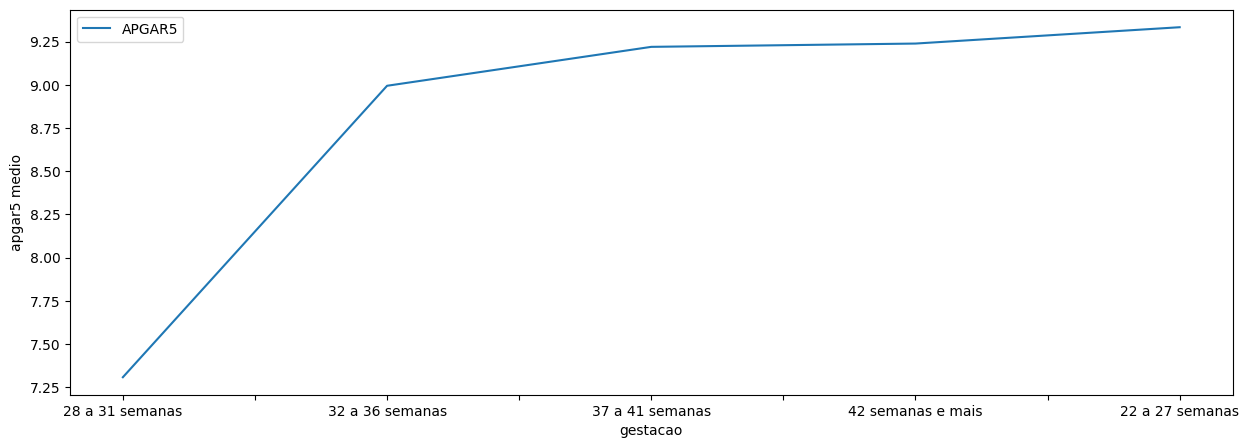

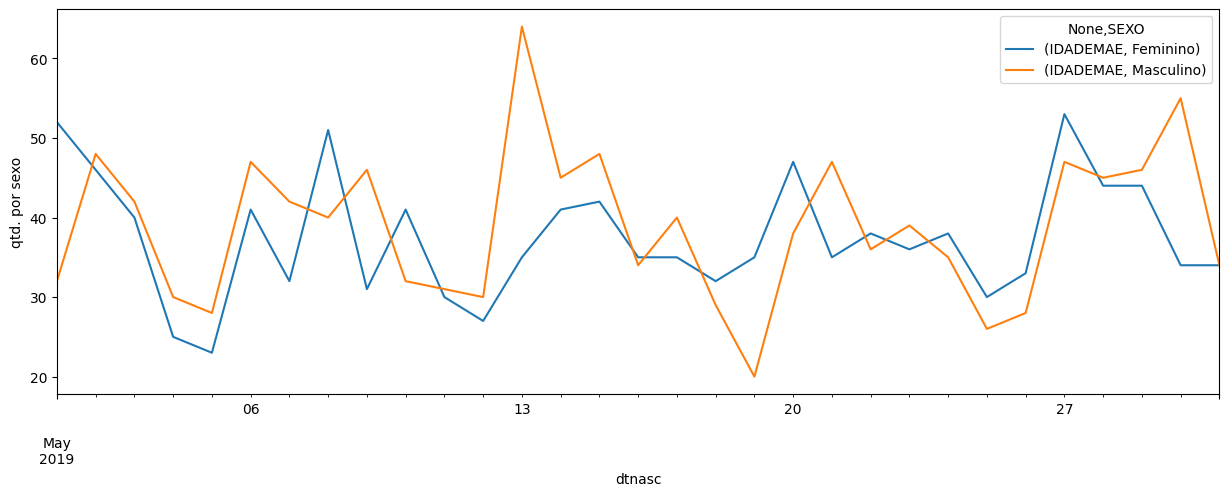

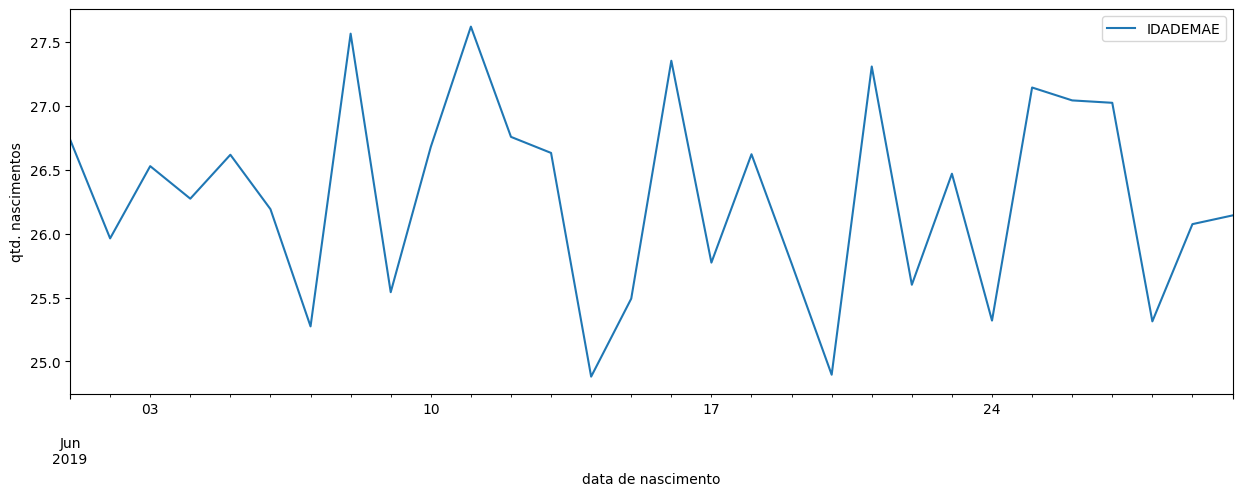

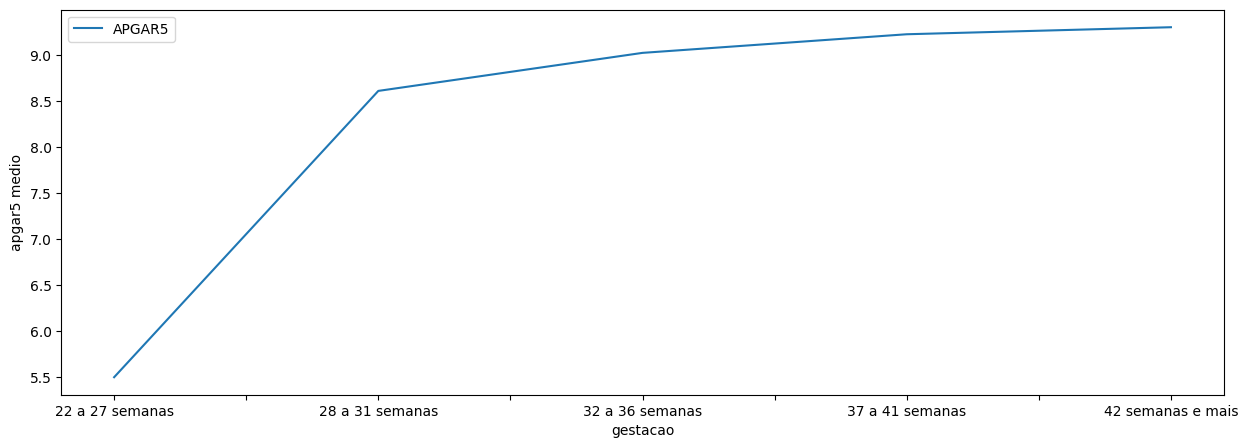

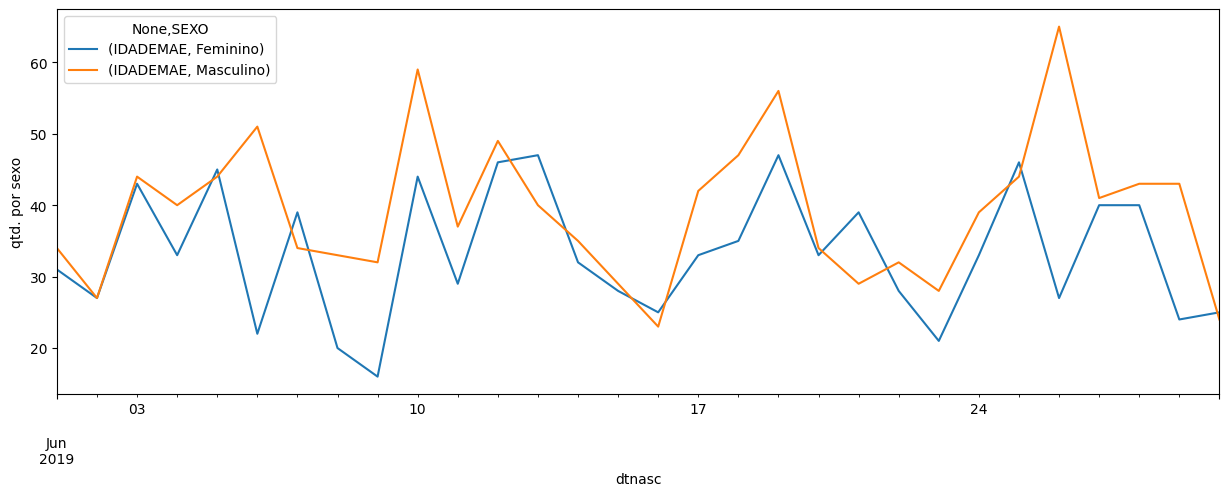

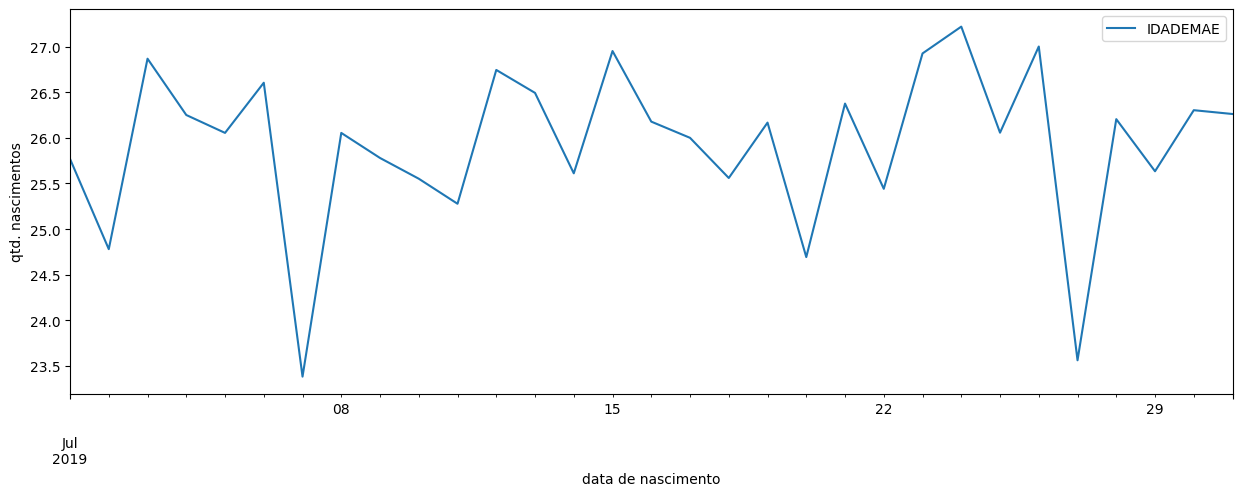

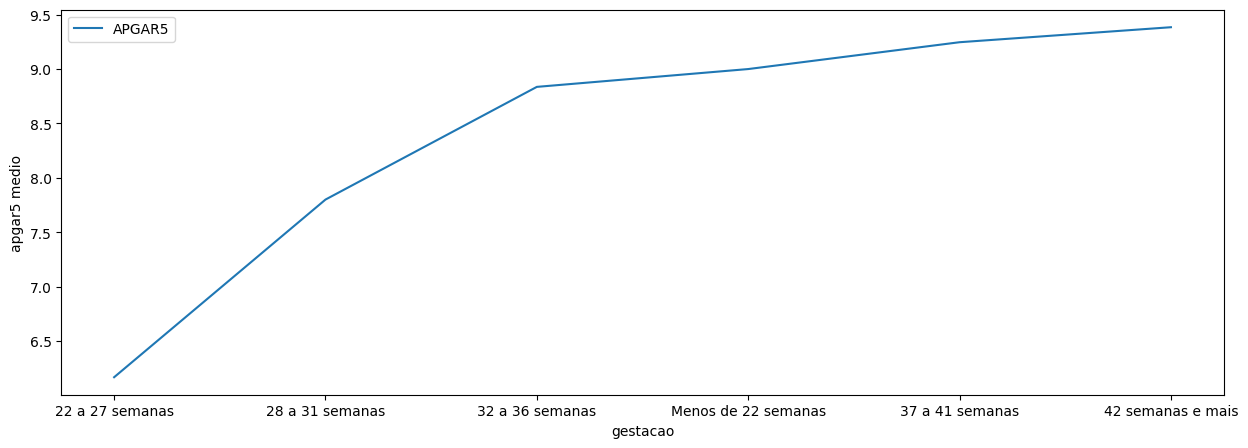

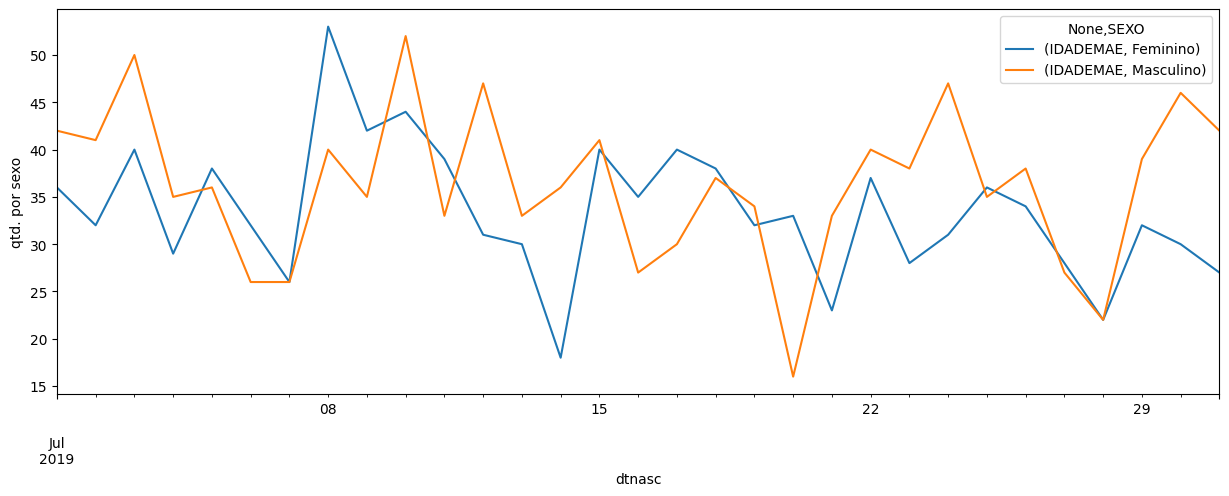

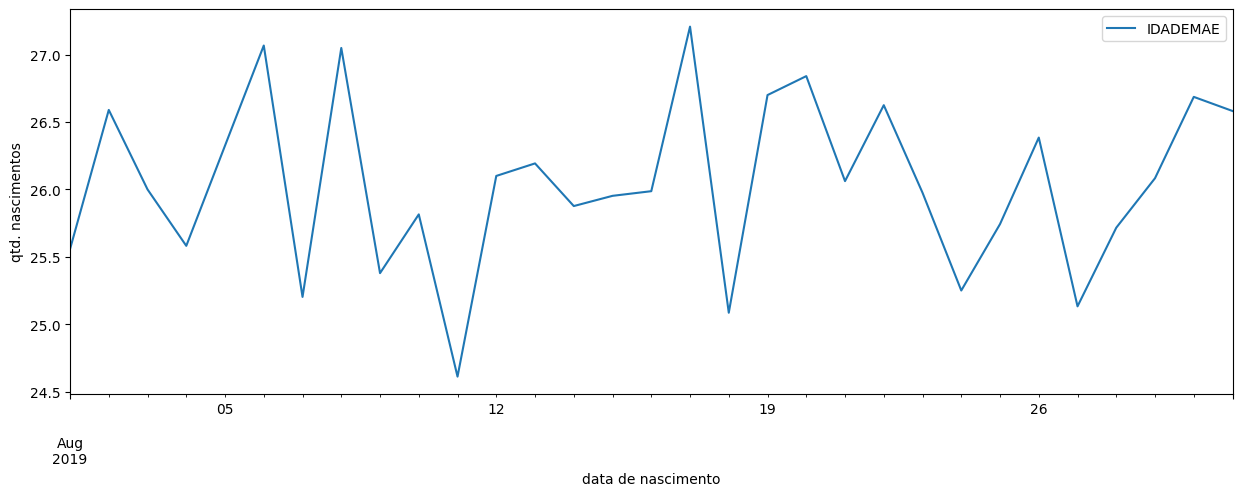

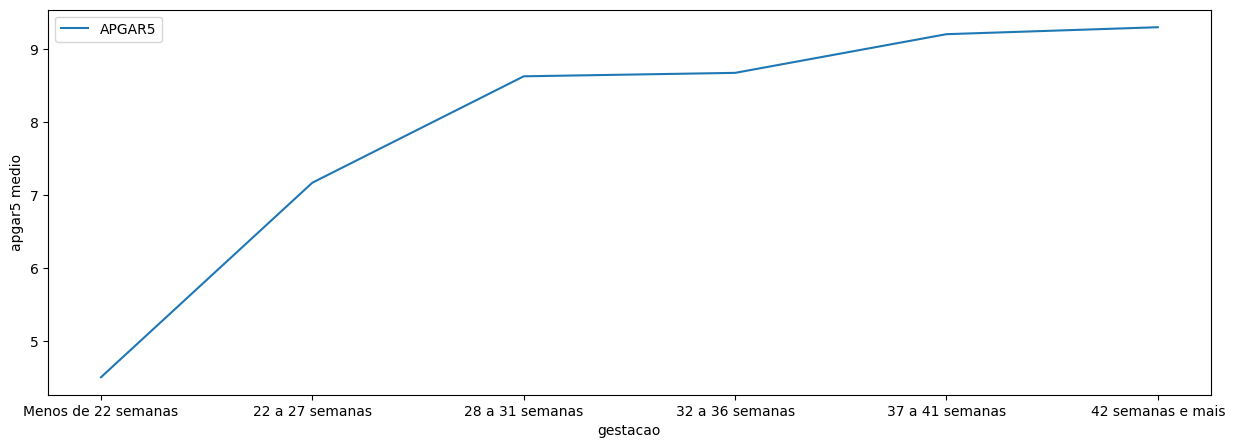

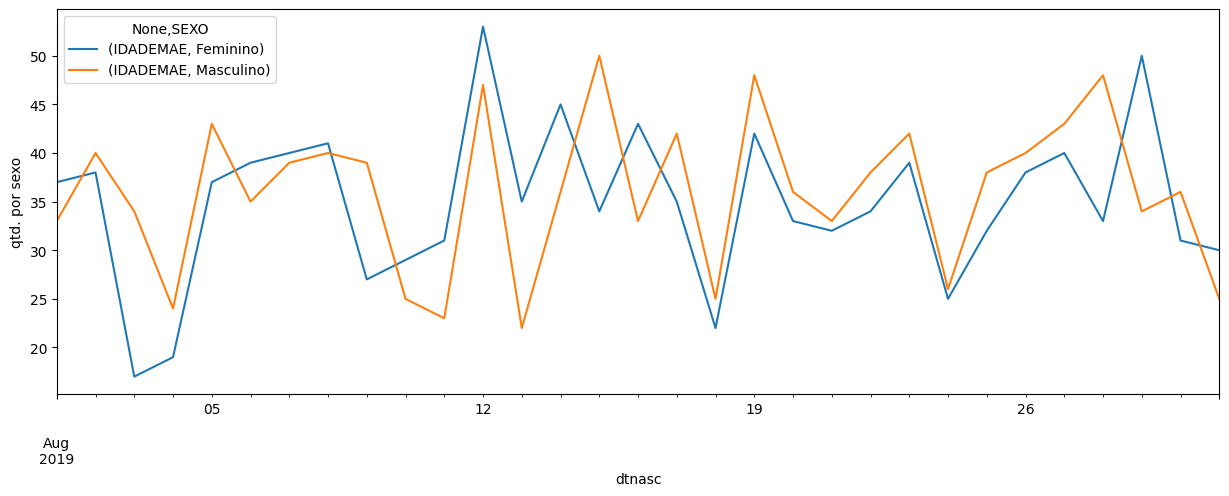

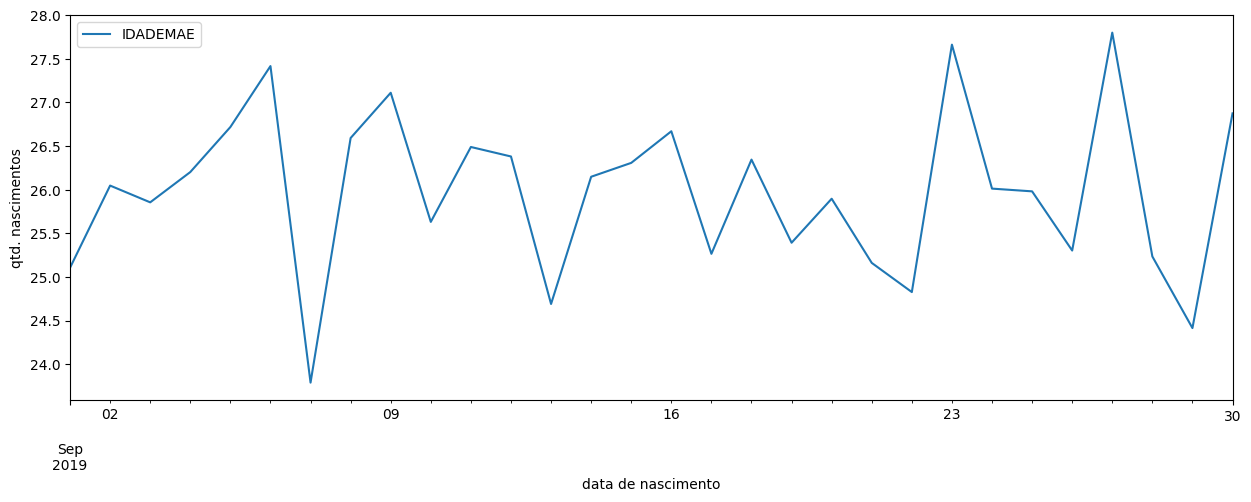

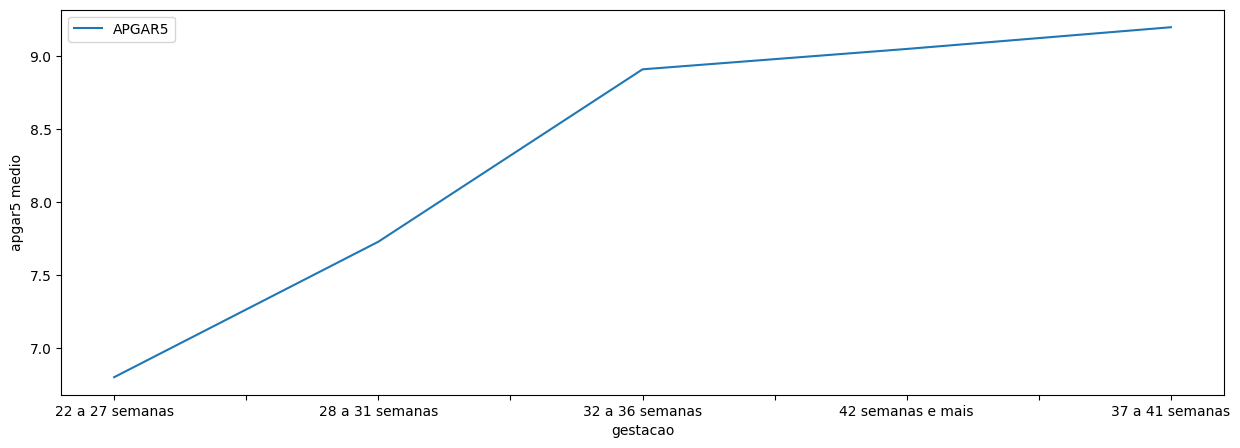

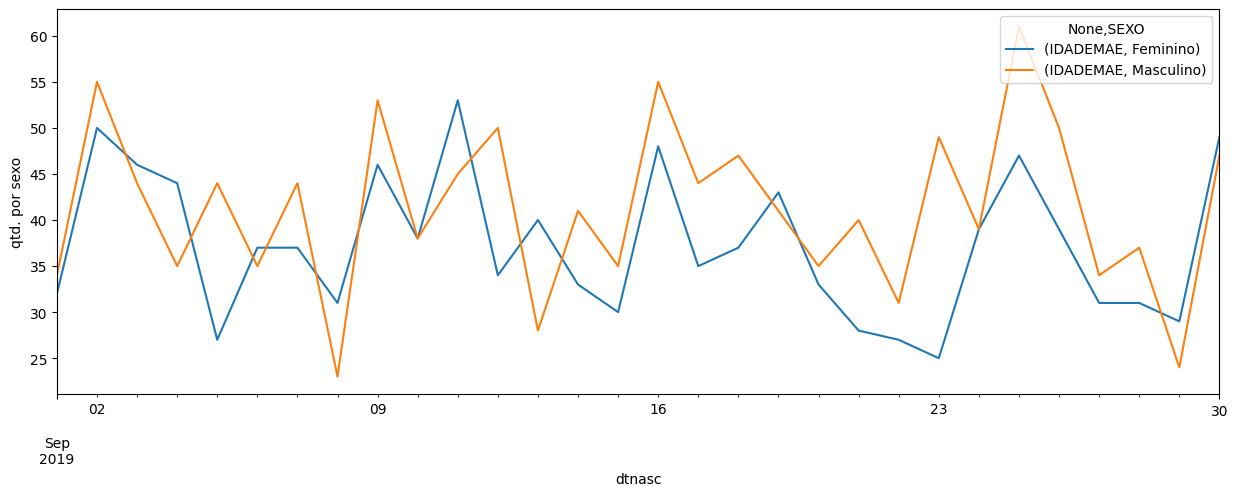

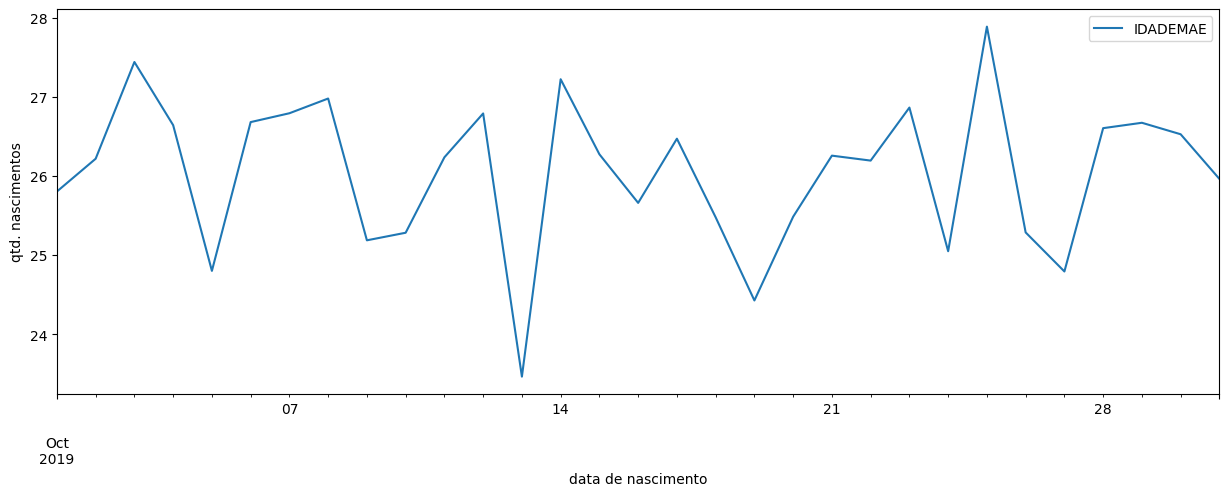

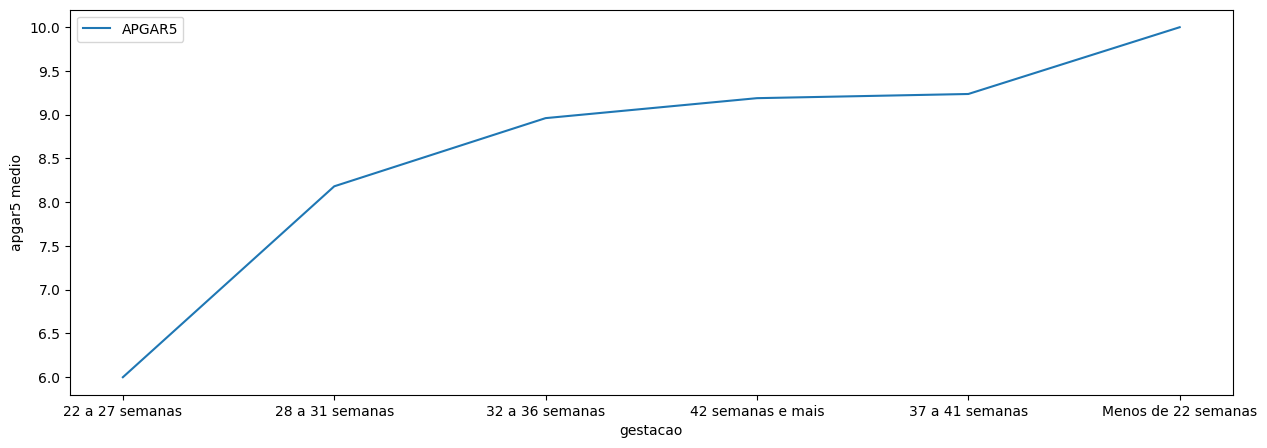

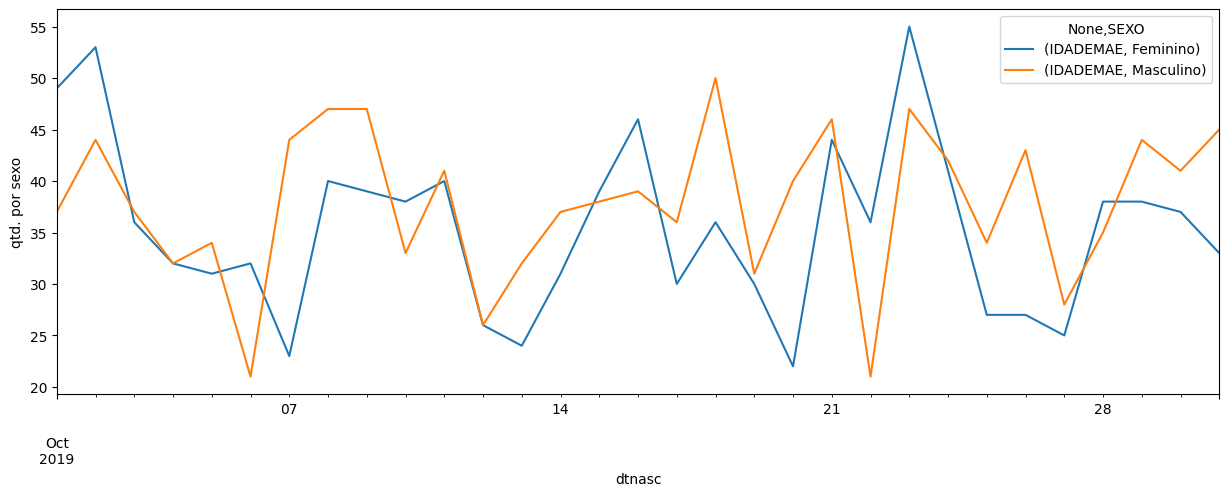

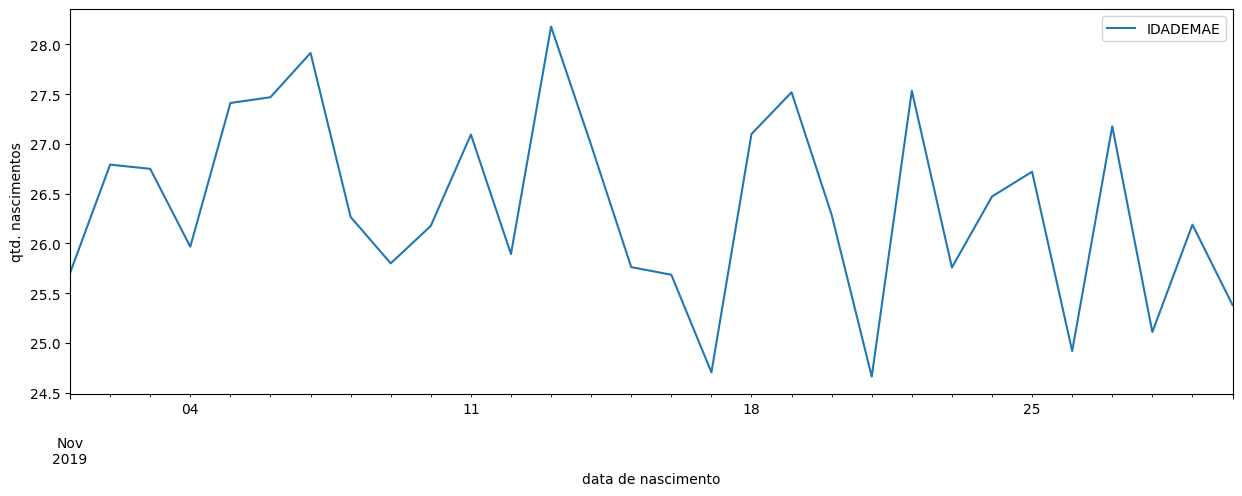

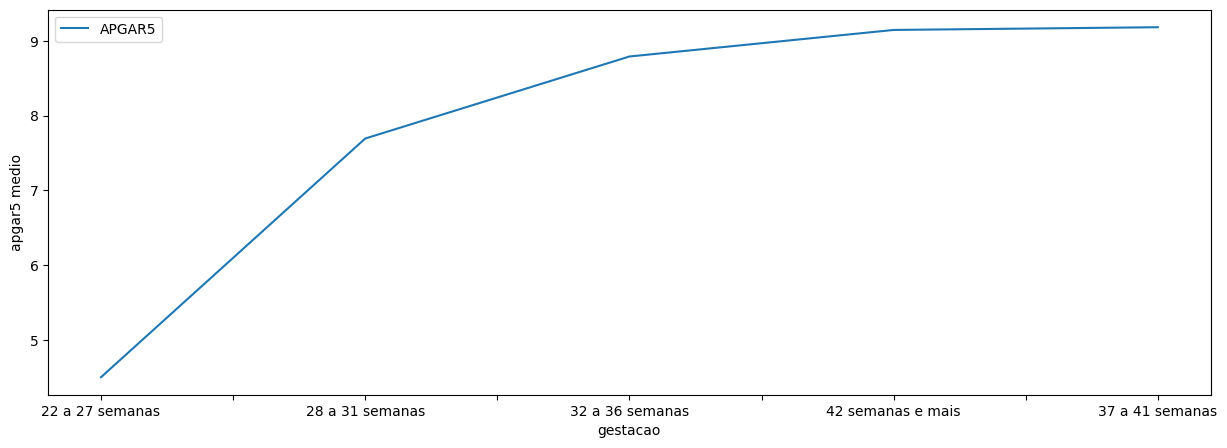

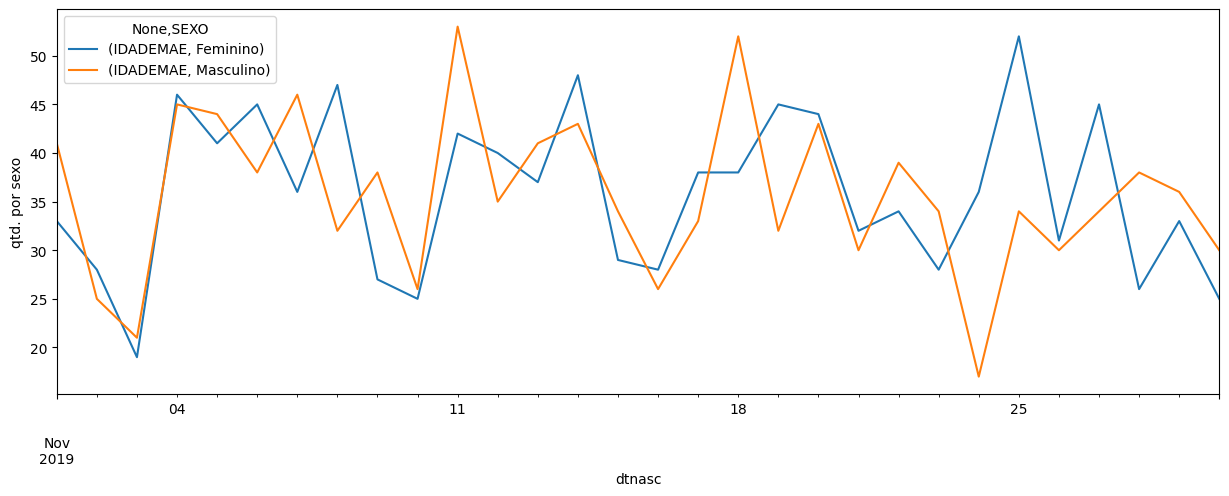

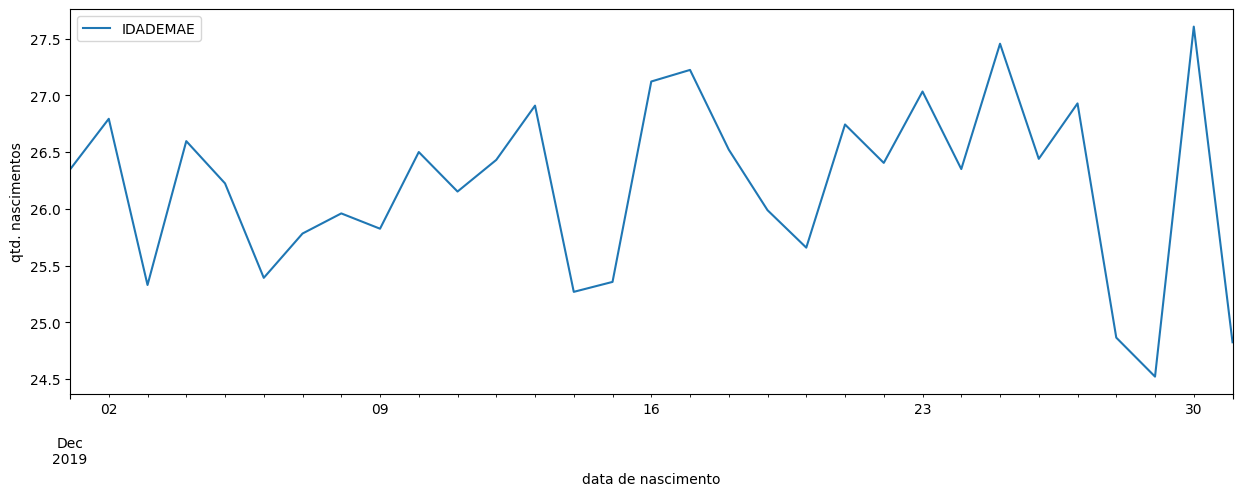

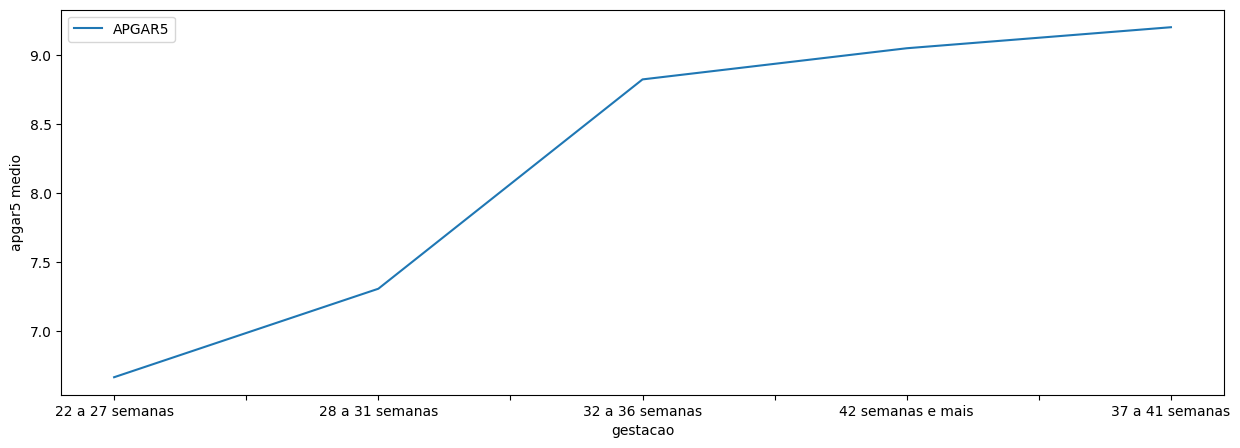

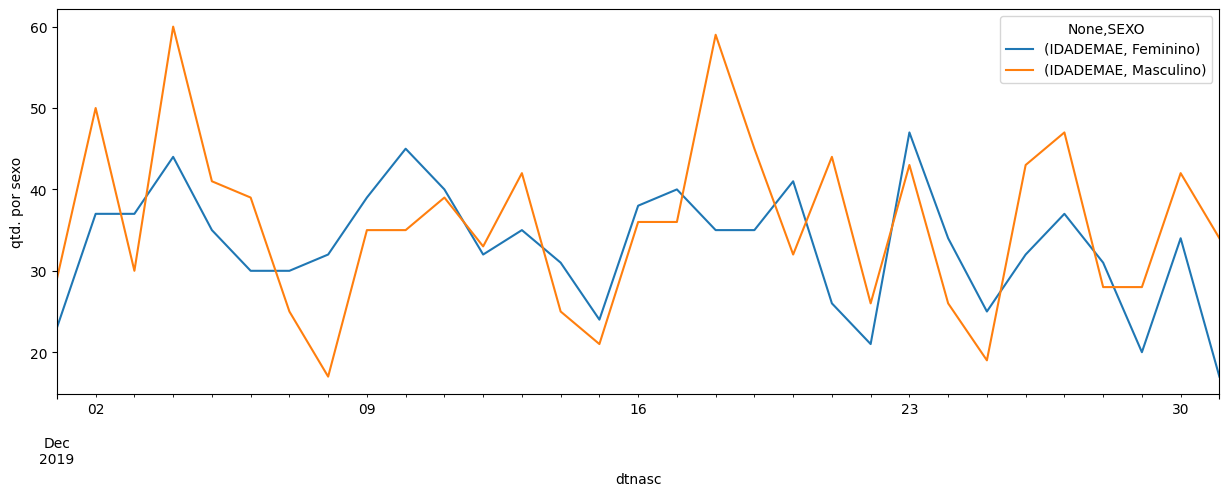

In [17]:
for mes in meses:
    df_aux = df.loc[df['DTNASC'].dt.month == mes]
    df_aux = df_aux[['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC', 'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI']]
    max_data = df_aux['DTNASC'].max().strftime('%Y-%m')
    plot_pivot_tabela(df_aux, 'IDADEMAE', 'DTNASC', 'mean', 'qtd. nascimentos', 'data de nascimento')
    plot_pivot_tabela(df_aux, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio', 'gestacao', 'sort')
    plot_pivot_tabela(df_aux, 'IDADEMAE', ['DTNASC', 'SEXO'], 'count', 'qtd. por sexo', 'dtnasc', 'unstack')
    print(f'Processamento do mês {max_data} concluído!')